# The Perceptron

In [35]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import pandas as pd

In [2]:
iris = load_iris(as_frame=True)

In [3]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
X[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [4]:
y = (iris.target == 0).astype(int) # If is iris setosa or not
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64

In [5]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [6]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # Predicts True and False for these 2 flowers
y_pred.astype(bool)

array([ True, False])

## The Multilayer Perceptron and Backpropagation

In [62]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
housing = fetch_california_housing()

In [64]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [10]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [12]:
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
print(f"RMSE: {rmse}")

RMSE: 0.5053326657968522


## Implementing MLPs with Keras

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2024-06-07 07:30:49.545178: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-07 07:30:49.545470: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 07:30:49.548657: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 07:30:49.590464: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 07:30:50.440459: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## Load the dataset

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [15]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.0833333, random_state=42)

In [17]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [18]:
X_valid.shape, X_valid.dtype

((5000, 28, 28), dtype('uint8'))

## Rescale the pixel intesities down to the 0-1 range

In [19]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [20]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [21]:
np.min(X_valid), np.max(X_valid)

(0.0, 1.0)

In [22]:
np.min(X_test), np.max(X_test)

(0.0, 1.0)

## Classes of the dataset

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [24]:
class_names[y_train[0]]

'Pullover'

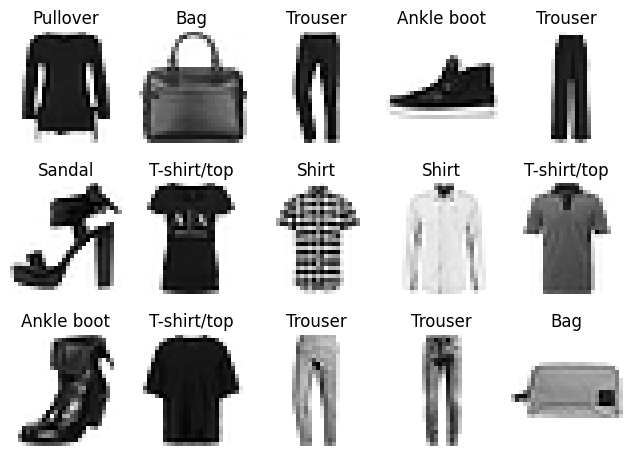

In [25]:
fig, ax = plt.subplots(3, 5)

for i in range(15):
    ax[i//5, i%5].imshow(X_train[i], cmap='binary')
    ax[i//5, i%5].set_title(class_names[y_train[i]])
    ax[i//5, i%5].axis('off')
plt.tight_layout(pad=1)
plt.show()

## Creating the model using the sequential API

In [40]:
tf.random.set_seed(42)

# Creation of the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

## Compiling the Model

In [42]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

## Training and evaluating the model

In [43]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=30, 
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7855 - loss: 0.6097 - val_accuracy: 0.8542 - val_loss: 0.4200
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8636 - loss: 0.3729 - val_accuracy: 0.8662 - val_loss: 0.3750
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8806 - loss: 0.3284 - val_accuracy: 0.8736 - val_loss: 0.3718
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8891 - loss: 0.3005 - val_accuracy: 0.8726 - val_loss: 0.3764
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8958 - loss: 0.2805 - val_accuracy: 0.8730 - val_loss: 0.3912
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8993 - loss: 0.2652 - val_accuracy: 0.8764 - val_loss: 0.3852
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9072 - loss: 0.2482 - val_accuracy: 0.8736 - val_loss: 0.4089
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9110 - loss: 0.2378 - 

In [44]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

<Axes: xlabel='Epoch'>

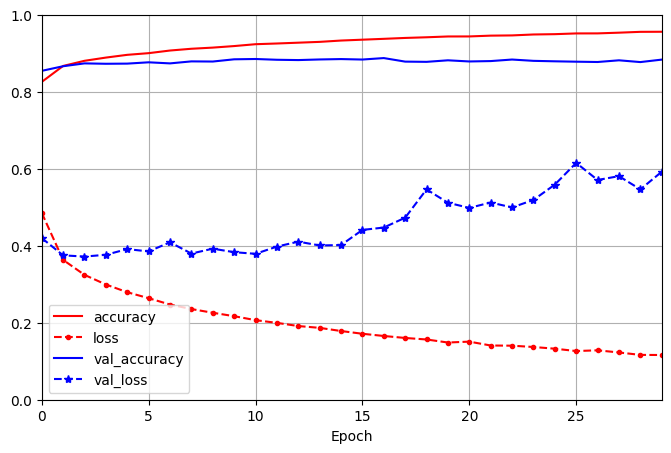

In [45]:
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0, 29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r-", "r--.", "b-", "b--*"]
)

In [46]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.8814 - loss: 0.6407


[0.622026264667511, 0.8824999928474426]

## Using the model to make predictions

In [50]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [53]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [56]:
y_new = y_test[:3]
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [58]:
y_new.shape[0]

3

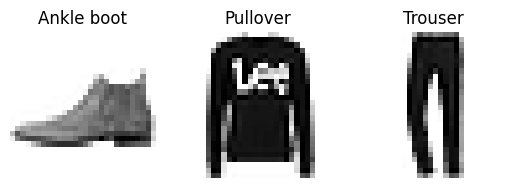

In [61]:
fig, ax = plt.subplots(1,3)
for idx in range(y_new.shape[0]):
    ax[idx].imshow(X_new[idx], cmap='binary')
    ax[idx].set_title(np.array(class_names)[y_new[idx]])
    ax[idx].axis('off')
plt.show()
    

# Building a Regression MLP Using the Sequential API

In [65]:
housing = fetch_california_housing()

In [66]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [69]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.summary()

/home/francisco/Documents/ML_for_Computer_Vision/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

In [70]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [71]:
norm_layer.adapt(X_train)

In [72]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.1071 - loss: 1.3034 - val_RootMeanSquaredError: 0.6180 - val_loss: 0.3819
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6335 - loss: 0.4018 - val_RootMeanSquaredError: 0.5836 - val_loss: 0.3406
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6026 - loss: 0.3635 - val_RootMeanSquaredError: 0.5943 - val_loss: 0.3532
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5885 - loss: 0.3465 - val_RootMeanSquaredError: 0.6060 - val_loss: 0.3672
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5770 - loss: 0.3331 - val_RootMeanSquaredError: 0.5585 - val_loss: 0.3119
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5685 - loss: 0.3234 - val_RootMeanSquaredError: 0.5514 - val_loss: 0.3040
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5608 - los

In [74]:
df_history = pd.DataFrame(history.history)
df_history.head()

,RootMeanSquaredError,loss,val_RootMeanSquaredError,val_loss
0,0.855294,0.731528,0.617986,0.381907
1,0.611179,0.373539,0.583580,0.340566
2,0.587709,0.345402,0.594266,0.353152
3,0.576798,0.332696,0.605980,0.367212
4,0.566340,0.320741,0.558460,0.311877


In [78]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f"MSE: {mse_test}\nRMSE: {rmse_test}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - RootMeanSquaredError: 0.5294 - loss: 0.2804
MSE: 0.2855387032032013
RMSE: 0.5343582034111023


## Building Complex Models Using the Functional API

In [80]:
# MODEL 01 - WIDE AND DEEP NN

# Creation of layers
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

# Mount of Neural Network
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 8)         │         17 │ input_layer_3[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 30)        │        270 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 30)        │        930 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [81]:
# MODEL 02 - HANDLING MULTIPLE INPUTS

# Creation of layers
norm_deep = tf.keras.layers.Normalization()
norm_wide = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

#Mounting of Model
input1 = tf.keras.layers.Input(shape=[6])
normalization01 = norm_deep(input1)

input2 = tf.keras.layers.Input(shape=[5])
normalization02 = norm_wide(input2)

hidden1 = hidden_layer1(normalization01)
hidden2 = hidden_layer2(hidden1)

concat = concat_layer([normalization02, hidden2])

output = output_layer(concat)

model = tf.keras.Model(inputs=[input1, input2], outputs=[output])

model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 8)         │         17 │ input_layer_4[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 30)        │        270 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 8)         │         17 │ input_layer_5[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 30)        │        930 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 38)        │          0 │ normalization_3[… │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         39 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,273 (4.98 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 34 (144.00 B)